In [1]:
# http://selenium-python.readthedocs.io/getting-started.html
import time 
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options as Chrome_Options
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options as Firefox_Options
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import glob
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
screenshots_dir = '../screenshots/'
selenium_path = '../selenium/'
driver_path = selenium_path + 'chromedriver'
adblock_path = selenium_path + 'adblock/1.500_0/'
video_url='https://youtu.be/Nf_pakPwZg0?t=37m58s'
data_path = "../screenshots/"

In [4]:
def show_img(img, gray=False):
    plt.figure(figsize=(10,10))
    if (gray):
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)
        
def show_img_from_path(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show_img(img, False)

In [75]:
def crop_announcement(img):
    return img[150:190,400:970]

def sharpen(img):
    return cv2.addWeighted(img, 8, cv2.blur(img, (3, 3)), -8, 256)

In [53]:
ff_screenshot= '../screenshots/ff11.png'

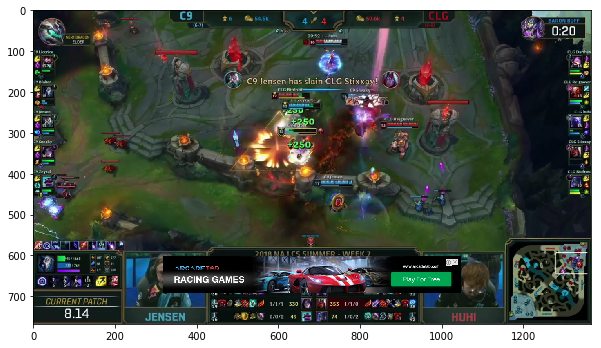

In [61]:
img = cv2.imread(ff_screenshot)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_img(img, False)
announcement = crop_announcement(img)

In [34]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


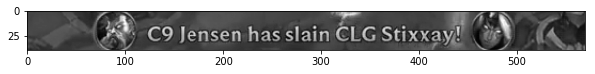

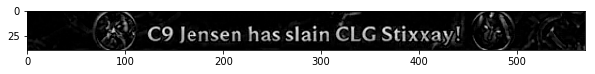

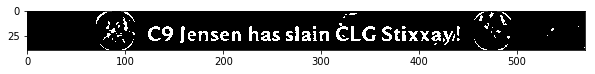

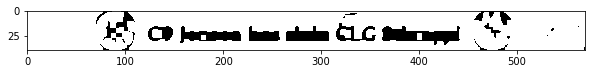

In [80]:
gray = cv2.cvtColor(announcement, cv2.COLOR_BGR2GRAY)
show_img(gray, True)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, sqKernel)
show_img(tophat, True)
thresh = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
show_img(thresh, True)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
# sharpen = sharpen(thresh)
# show_img(sharpen, True)
imagem = cv2.bitwise_not(thresh)
show_img(imagem, True)
text = pytesseract.image_to_string(imagem, config="-c tessedit_char_whitelist=!abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 -psm 6")
print(text)